In [751]:
import pandas as pd
import numpy as np
from sklearn import tree
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant


# 전처리
from sklearn.model_selection import train_test_split  # 데이터 분할
from sklearn.preprocessing import StandardScaler  # 표준화
from sklearn.decomposition import PCA  # 차원축소

# 모델
# 선형회귀
from sklearn.linear_model import LinearRegression  # 선형회귀

# 다중선형회귀
from statsmodels.formula.api import ols  # 공식을 통한 다중 선형회귀
import statsmodels.api as sm  # 다중선형회귀 OLS 객체가 있는 api
import statsmodels.formula.api as smf
from sklearn.linear_model import ElasticNet, Lasso, Ridge  # 규제화 회귀

# 트리 회귀
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
# 기타회귀
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


# 분류
from sklearn.tree import DecisionTreeClassifier
from statsmodels.api import Logit
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 모델 평가
# 회귀
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE  # 후진제거법(변수선택)
from sklearn.model_selection import cross_val_score
# 분류
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


# 시각화

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.tree import export_graphviz


# 모델튜닝
from sklearn.model_selection import GridSearchCV
from pandas import read_csv

from scipy import stats
from random import random
from random import uniform
import math
import os
import missingno as msno
import graphviz  # 나무구조 시각화
import matplotlib.font_manager as fm
import warnings
from sklearn.tree import export_graphviz

In [752]:
df_raw = read_csv('classification.csv')

In [753]:
df_raw

,Unnamed: 0,customer_id,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,"Bags, Luggage & Accessories",...,Toys & Gifts,Watches,"Wedding , Party & Events",Fashion Accessories,Discount,Apparel,Jewelry,Headphones & Earphones,Cell Phones & Accessories,canceled
0,0,E13313,Honolulu,HI,339,156,small,sightseeing,other,231.0,...,4.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,E18097,Houston,TX,2325,1658,middle,other,south,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,E16656,San Jose,CA,1003,461,middle,sightseeing,west,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,E16875,Phoenix,AZ,1759,1341,middle,other,west,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,E13094,Phoenix,AZ,1759,1341,middle,other,west,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,3431,E14698,Las Vegas,NV,675,367,small,sightseeing,west,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3432,3432,E13298,San Diego,CA,1429,844,middle,sightseeing,west,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3433,3433,E14569,New York,NY,8177,778,big,metro,east,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3434,3434,E16688,Phoenix,AZ,1759,1341,middle,other,west,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [754]:
df_y = df_raw['canceled']

In [755]:
df_y = df_raw['canceled']
df_x = df_raw.drop(['canceled', 'customer_id','city','state', 'pop_thousand', 'land_sq_meter', 'pop_size', 'city_type', 'city_lctn'], axis = 1)

In [756]:
sm = SMOTE()

In [757]:
resampled_x , resample_y = sm.fit_resample(df_x, df_y)


In [758]:
train_x, test_x, train_y, test_y = train_test_split(resampled_x, resample_y, test_size = 0.1, random_state=1234)

In [759]:
model_name = []
train_result = []
test_result = []

In [760]:
gb = GradientBoostingClassifier(random_state = 1234, max_depth=3)
gb.fit(train_x, train_y)
print(gb.score(train_x, train_y))
print(gb.score(test_x, test_y))
model_name.append('GB')
train_result .append(gb.score(train_x, train_y))
test_result.append(gb.score(test_x, test_y))

0.6862745098039216
0.6560509554140127


In [761]:
mlp = MLPClassifier(random_state = 123, batch_size=1000,max_iter=1000).fit(train_x, train_y)
print(mlp.score(train_x, train_y))
print(mlp.score(test_x, test_y))
model_name.append('MLP')
train_result .append(mlp.score(train_x, train_y))
test_result.append(mlp.score(test_x, test_y))

0.5168910937869123
0.5010615711252654


In [762]:
rf = RandomForestClassifier(random_state = 1234, n_estimators=100, max_depth=12,criterion = 'log_loss').fit(train_x, train_y)
print(rf.score(train_x, train_y))
print(rf.score(test_x, test_y))
model_name.append('RF')
train_result .append(rf.score(train_x, train_y))
test_result.append(rf.score(test_x, test_y))

0.7072997873848335
0.6602972399150743


In [763]:
svc = SVC(random_state = 1234).fit(train_x, train_y)
print(svc.score(train_x, train_y))
print(svc.score(test_x, test_y))
model_name.append('SVC')
train_result .append(svc.score(train_x, train_y))
test_result.append(svc.score(test_x, test_y))

0.6385542168674698
0.6348195329087049


In [764]:
knn = KNeighborsClassifier(n_neighbors=10).fit(train_x, train_y)
print(knn.score(train_x, train_y))
print(knn.score(test_x, test_y))
model_name.append('KNN')
train_result.append(knn.score(train_x, train_y))
test_result.append(knn.score(test_x, test_y))

0.7302149775572879
0.6794055201698513


(0.0, 1.0)

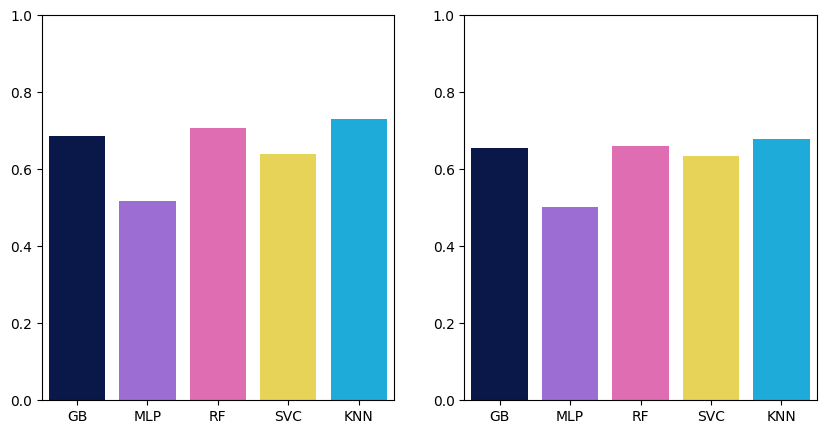

In [765]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.barplot(x = model_name, y = train_result)
plt.ylim(0,1)
plt.subplot(1,2,2)
sns.barplot(x = model_name, y = test_result)
plt.ylim(0,1)


In [766]:
result = pd.DataFrame()

In [767]:
y_pred = list(rf.predict_proba(X = test_x)[:, 1])

In [768]:
temp = list(map((lambda x : 1 if x > 0.45 else 0), y_pred))

In [769]:
print(classification_report(test_y, temp, digits =3))

              precision    recall  f1-score   support

         0.0      0.671     0.637     0.654       237
         1.0      0.650     0.684     0.667       234

    accuracy                          0.660       471
   macro avg      0.661     0.660     0.660       471
weighted avg      0.661     0.660     0.660       471



In [770]:
print(confusion_matrix(test_y, temp))

[[151  86]
 [ 74 160]]


In [771]:
train_result

[0.6862745098039216,
 0.5168910937869123,
 0.7072997873848335,
 0.6385542168674698,
 0.7302149775572879]

In [772]:
result = pd.DataFrame({
    'model' : model_name,
    'train' : train_result,
    'test' : test_result
})

In [773]:
result.T

,0,1,2,3,4
model,GB,MLP,RF,SVC,KNN
train,0.686275,0.516891,0.7073,0.638554,0.730215
test,0.656051,0.501062,0.660297,0.63482,0.679406


In [774]:
read_csv('variation.csv')[read_csv('variation.csv')['var'] > 2000]

,Unnamed: 0,product_name,var
0,345,WORLD WAR 2 GLIDERS ASSTD DESIGNS,114779.611160
1,21,ASSORTED COLOUR BIRD ORNAMENT,83432.256115
2,222,PAPER POCKET TRAVELING FAN,46427.160096
3,243,PINK/BLUE DISC/MIRROR STRING,31393.904762
4,246,POTTING SHED ROSE CANDLE,19700.952381
5,158,HEART OF WICKER SMALL,19432.046236
6,289,SET OF TEA COFFEE SUGAR TINS PANTRY,18607.562621
7,108,DOLLY GIRL WALL ART,17697.000000
8,81,CHRISTMAS PUDDING TRINKET POT,10639.540244
9,69,CAST IRON HOOK GARDEN FORK,9872.418182


In [775]:
product = read_csv('03_stock_data.csv')

In [776]:
product[product['product_name'] == 'COLOUR GLASS T-LIGHT HOLDER HANGING']

,product_name,stock_type
1076,COLOUR GLASS T-LIGHT HOLDER HANGING,buying


<AxesSubplot: >

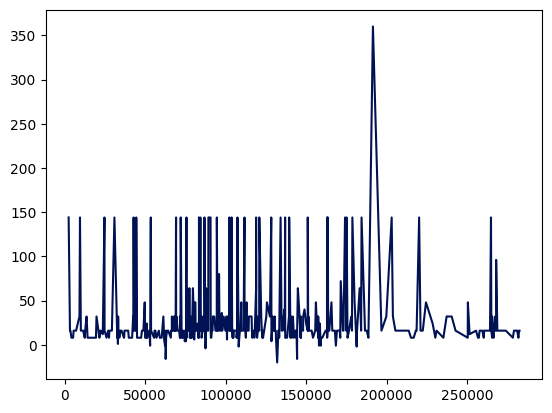

In [777]:
sales.loc[sales['product_name'] == 'COLOUR GLASS T-LIGHT HOLDER HANGING','quantity'].plot()

In [778]:
sales['sales'].sum()

5549560.6340000015

In [779]:
(sales[sales['product_name'].str.contains('CHRISTMAS')])['sales'].sum()

188509.77

In [780]:
(sales[sales['product_name'].str.contains('ORNAMENT')])['sales'].sum()

52526.86000000001

In [781]:
(sales[sales['product_name'].str.contains('EASTER')])['sales'].sum()

19744.239999999998

In [782]:
(sales[sales['product_name'].str.contains('SKULL')])['sales'].sum()

62296.58

In [783]:
(sales[sales['product_name'].str.contains('CUP')])['sales'].sum()

94509.43000000001

In [784]:
(188509+19744+94509 + 62296 + 52526) / 5549560

0.07524632583484096

In [785]:
product[product['product_name'].str.contains('EASTER')].count()

product_name    44
stock_type      44
dtype: int64

In [786]:
173 / 3715

0.046567967698519515

In [787]:
count = [144,417584]
n_obs = [3715, 5549560]


In [788]:
my_palette = ['#'+hex for hex in "001253 9b5de5 f15bb5 fee440 00bbf9 00f5d4".split(' ')]
my_palette = sns.set_palette(my_palette)
sns.color_palette()


[(0.0, 0.07058823529411765, 0.3254901960784314),
 (0.6078431372549019, 0.36470588235294116, 0.8980392156862745),
 (0.9450980392156862, 0.3568627450980392, 0.7098039215686275),
 (0.996078431372549, 0.8941176470588236, 0.25098039215686274),
 (0.0, 0.7333333333333333, 0.9764705882352941),
 (0.0, 0.9607843137254902, 0.8313725490196079)]

Text(0.5, 1.0, 'CHRISTMAS')

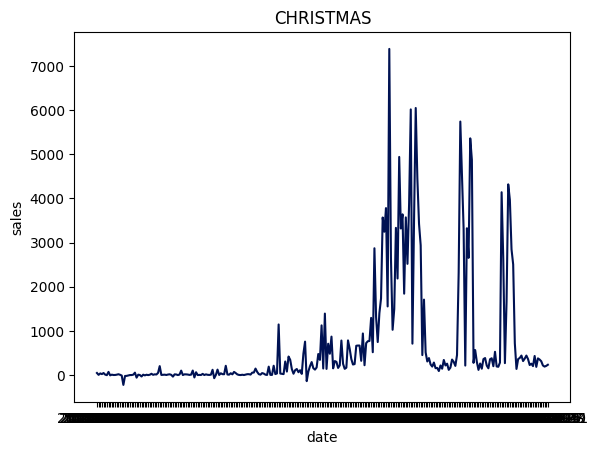

In [789]:
sns.lineplot(sales[sales['product_name'].str.contains('CHRISTMAS')].groupby('date',as_index =False)['sales'].sum(), x = 'date', y = 'sales')
plt.title('CHRISTMAS')


Text(0.5, 1.0, 'EASTER')

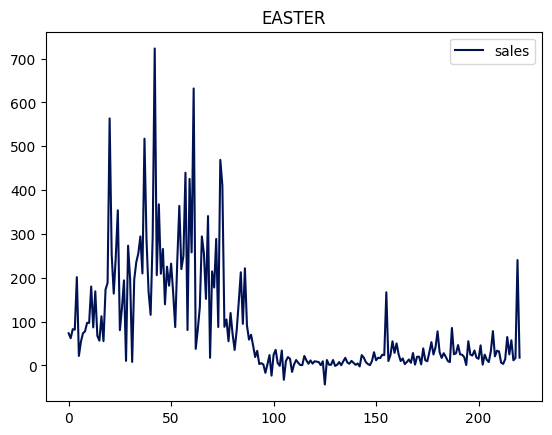

In [790]:
sales[sales['product_name'].str.contains('EASTER')].groupby('date',as_index =False)['sales'].sum().plot()
plt.title('EASTER')

In [791]:
stock = read_csv('03_stock_data.csv')

In [792]:
sales = pd.merge(sales, stock, on = 'product_name')

In [801]:
buying = sales[sales['stock_type'] == 'buying'].groupby(['product_name','date'], as_index=False)['invoice'].count()

In [802]:
buying

,product_name,date,invoice
0,12 RED ROSE PEG PLACE SETTINGS,2021-01-05,2
1,12 RED ROSE PEG PLACE SETTINGS,2021-01-06,1
2,12 RED ROSE PEG PLACE SETTINGS,2021-01-07,1
3,12 RED ROSE PEG PLACE SETTINGS,2021-01-13,1
4,12 RED ROSE PEG PLACE SETTINGS,2021-01-18,1
...,...,...,...
15958,ZINC T-LIGHT HOLDER STARS SMALL,2021-12-09,1
15959,ZINC T-LIGHT HOLDER STARS SMALL,2021-12-11,1
15960,ZINC T-LIGHT HOLDER STARS SMALL,2021-12-21,2
15961,ZINC T-LIGHT HOLDER STARS SMALL,2021-12-22,1


In [839]:
buying.groupby('product_name',as_index=False)['invoice'].sum().sort_values(by='invoice').head(20)

,product_name,invoice
17,AMETHYST DIAMANTE EXPANDABLE RING,1
237,PINK FLOCK SUEDE CUSHION COVER,1
236,PINK FLOCK PHOTO FRAME,1
330,UBO-LIGHT TRIOBASE BLUE,1
28,BIRD ON BRANCH CANVAS SCREEN,1
66,CANNABIS LEAF BEAD CURTAIN,1
102,DANISH ROSE UMBRELLA STAND,1
217,ORANGE FELT VASE + FLOWERS,1
105,DIAMANTE HAIR GRIP PACK/2 MONTANA,1
216,OLD DOC RUSSEL METAL SIGN,1


In [838]:
buying['invoice'].sum()

24490

In [825]:
sales.loc[sales['product_name'] == 'WORLD WAR 2 GLIDERS ASSTD DESIGNS','stock_type'].unique()

array(['buying'], dtype=object)

In [833]:
sales.loc[sales['stock_type'] == 'buying', 'product_name'].unique().shape

(357,)

In [841]:
sales['date'] = pd.to_datetime(sales['date'])

In [842]:
sales['month'] = sales['date'].apply(lambda x : x.month)

In [845]:
sales[sales['stock_type'] == 'buying'].groupby('month')['sales'].sum()

month
1     28232.77
2     29176.48
3     39176.91
4     33899.76
5     39508.02
6     29695.84
7     34283.11
8     40597.55
9     66501.73
10    39922.63
11    36151.91
12    33675.18
Name: sales, dtype: float64

In [849]:
buying = sales[sales['stock_type'] == 'buying']

In [859]:
stock = buying.groupby('product_name', as_index = False)['quantity'].sum().sort_values('quantity')

In [865]:
stock[stock['quantity'] < 10].reset_index(drop = True)

,product_name,quantity
0,FLAMINGO LIGHTS,-1
1,BLUE FLYING SINGING CANARY,-1
2,LARGE ROUND CUTGLASS CANDLESTICK,-1
3,GREEN ENAMEL FLOWER HAIR TIE,1
4,ORANGE FELT VASE + FLOWERS,1
5,UBO-LIGHT TRIOBASE BLUE,1
6,OLD DOC RUSSEL METAL SIGN,1
7,MURANO STYLE GLASS BRACELET BLACK,1
8,MUMMY MOUSE RED GINGHAM RIBBON,1
9,DANISH ROSE UMBRELLA STAND,1


In [866]:
consignment = sales[sales['stock_type'] == 'consignment']

In [873]:
consignment.groupby('product_name',as_index = False)['quantity'].sum().sort_values('quantity',ascending = False).head(40)

,product_name,quantity
1501,JUMBO BAG RED RETROSPOT,34590
3200,WHITE HANGING HEART T-LIGHT HOLDER,29059
2237,POPCORN HOLDER,23108
3056,VICTORIAN GLASS HANGING T-LIGHT,19628
1917,PACK OF 12 LONDON TISSUES,19422
1948,PACK OF 72 RETROSPOT CAKE CASES,19265
188,ASSORTED COLOURS SILK FAN,19033
447,BROCADE RING PURSE,18983
1946,PACK OF 60 PINK PAISLEY CAKE CASES,18592
2816,SMALL POPCORN HOLDER,17042
